# Семестровая работа
## Вариант №4

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

## Задание №1
Возьмите
набор
данных
согласно
своему
варианту
(https://cloud.mail.ru/public/AQp5/X3obvSZRo). Датасет представляет собой набор
признаков, признак в последнем столбце является целевым (его надо прогнозировать).
1. Проведите предварительный анализ и подготовку данных, обработайте
пропущенные значения.
2. Проведите статистический анализ, оцените корреляции между признаками, оцените
возможные выбросы в данных, постройте поясняющие графики. Удалите из
рассмотрения признаки, которые не влияют на целевой.
3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).
4. Для предсказания целевого признака постройте следующие модели, используя
библиотеку sklearn:
a. Линейная регрессия LinearRegression()
b. Случайный лес RandomForestRegressor()
c. Метод ближайших соседей KNeighborsRegressor()
d. Метод опорных векторов SVR()
e. Логистическая регрессия LogisticRegression()
5. Для каждой модели попытайтесь добиться наилучшего возможного результата
предсказания.
6. Оцените качество работы моделей. Выведите для каждой модели ее score().
Напишите какая модель дала наилучший результат. Выведите ее значение
feature_importances_

1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения.

In [2]:
df = pd.read_csv('./dataset_var4.csv', header=None, sep=';')
df

,0,1,2,3,4,5,6,7
0,0.323710,0.929629,-0.767670,1.116340,-0.070416,-0.096773,-1.341757,88.929263
1,-2.653632,-0.812825,0.747477,NaN,-0.073235,-0.447236,-0.308805,-111.970141
2,-1.012406,-0.014101,NaN,-0.821736,0.129890,1.606278,0.284032,-40.252999
3,-0.633402,-0.549693,NaN,0.170157,-0.516859,-0.303740,1.429740,-11.120857
4,1.127122,-0.792454,NaN,0.064311,-0.070108,-1.234200,-1.306032,-33.972466
...,...,...,...,...,...,...,...,...
95,-0.511010,0.510621,1.296339,0.308947,-0.132423,-1.027070,-0.802284,28.272050
96,-0.720866,0.101553,NaN,-0.936991,-0.626092,-0.120187,-1.620629,-76.814252
97,-0.698583,12.993976,NaN,0.022122,0.864806,1.351385,-0.470382,72.033779
98,-0.492031,-0.330730,0.105661,-0.320204,-0.927244,0.587869,1.437950,-48.915663


In [3]:
df = df.dropna()
df

,0,1,2,3,4,5,6,7
0,0.323710,0.929629,-0.767670,1.116340,-0.070416,-0.096773,-1.341757,88.929263
5,-0.491143,-0.198721,0.014167,-1.162147,1.124064,1.767891,-0.203091,-43.445488
7,-1.824985,-0.508286,-0.148827,-0.008155,-0.809323,0.528586,-0.154057,-25.415641
8,-0.901791,-0.578246,-0.359018,-1.487444,-0.813810,-1.430500,-0.149159,-132.951139
9,0.587963,-0.028495,-1.822360,-0.884621,2.514780,-1.251621,0.658645,18.236957
11,0.286044,-0.031437,-0.809464,-1.429172,0.243123,0.819071,-0.522562,-81.983664
12,1.042875,-0.449157,1.635729,1.283271,1.178285,-2.638386,0.838887,104.568495
15,0.981508,0.369503,-1.189662,-0.026429,1.048165,0.803523,-0.646076,38.732004
30,-0.312134,0.487728,-0.261964,0.880477,0.127834,0.154806,1.304708,79.169700
31,0.270436,1.089406,0.222634,0.681224,-0.053473,0.510632,-0.027881,72.458856


2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

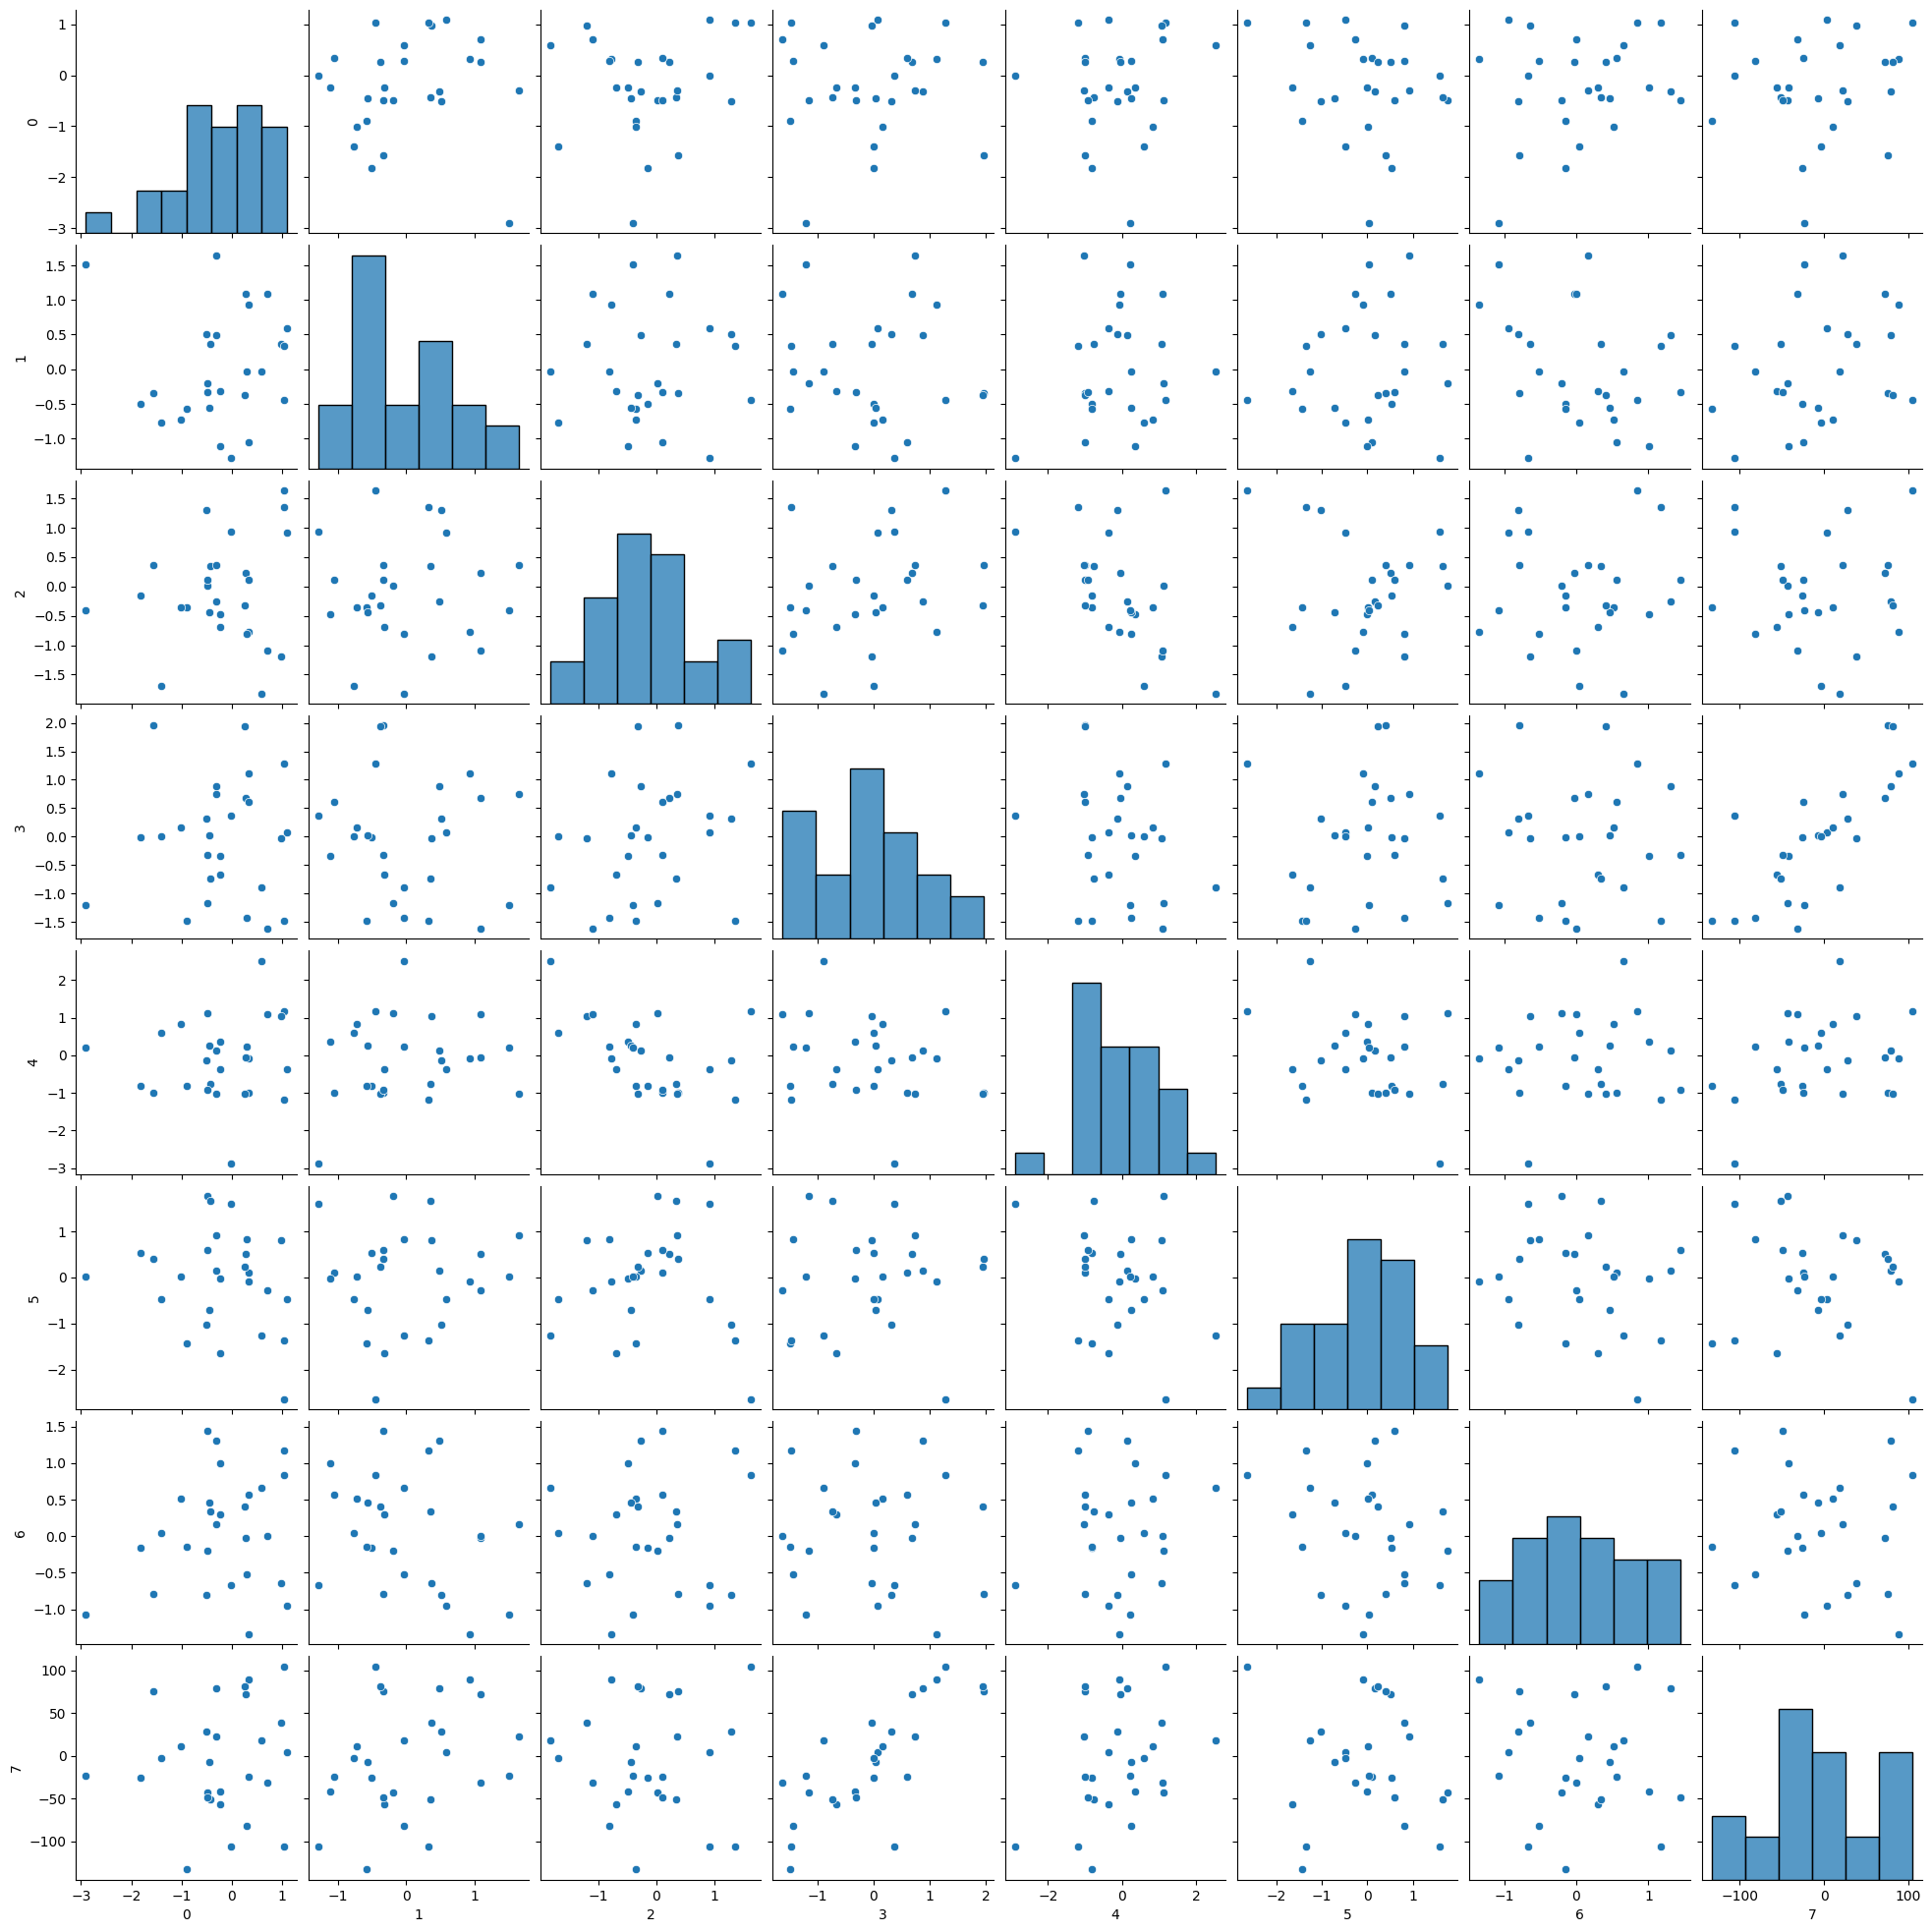

In [4]:
sb.pairplot(df)

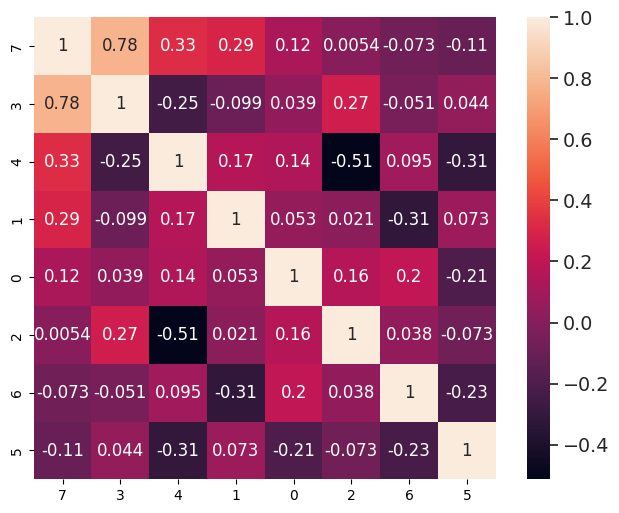

In [5]:
corrmat = df.corr()
k = 8
top8_attr = corrmat.nlargest(k, 7).index
top8_mat = corrmat.loc[top8_attr, top8_attr]
fig,ax = plt.subplots(figsize=(8,6))
sb.set(font_scale=1.25)
sb.heatmap(top8_mat, annot=True, annot_kws={'size':12}, square=True)
plt.show()

In [6]:
x = df.iloc[:, [1, 3, 4]]
y = df.iloc[:, [7]]

3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

4. Для предсказания целевого признака постройте следующие модели, используя библиотеку sklearn: a. Линейная регрессия LinearRegression() b. Случайный лес RandomForestRegressor() c. Метод ближайших соседей KNeighborsRegressor() d. Метод опорных векторов SVR() e. Логистическая регрессия LogisticRegression()
5. Для каждой модели попытайтесь добиться наилучшего возможного результата предсказания.
6. Оцените качество работы моделей. Выведите для каждой модели ее score(). Напишите какая модель дала наилучший результат. Выведите ее значение feature_importances_

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9812462708827722

In [9]:
clf = RandomForestRegressor(random_state=1, n_estimators=6)
clf.fit(X_train, y_train.values.ravel())
clf.score(X_test, y_test)

0.6414666642520412

In [10]:
clf = KNeighborsRegressor()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9198355161359653

In [11]:
regressor = SVR(kernel="linear", C=100, gamma="auto")
regressor.fit(X_train, y_train.values.ravel())
regressor.score(X_test, y_test)

0.9841821436984711

Наилучший результат показал метод опорных векторов SVR()

Feature: 0, Score: 956.10095
Feature: 1, Score: 7317.05495
Feature: 2, Score: 2866.05568


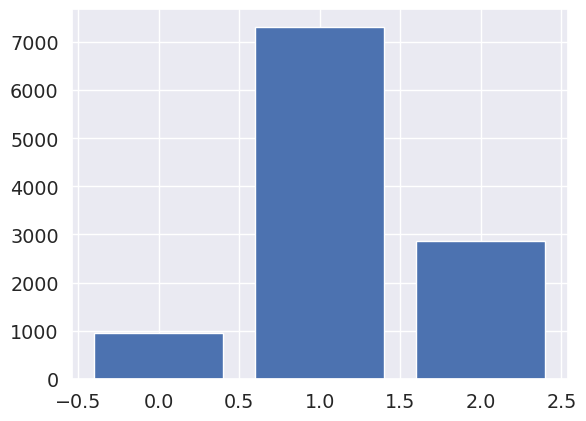

In [12]:
results = permutation_importance(regressor, X_train, y_train.values.ravel(), scoring='neg_mean_squared_error')
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Задание №2
Возьмите
набор
данных
согласно
(https://cloud.mail.ru/public/MWZh/DQkbAHKmi). Датасет
признаков, в последнем столбце указан класс объекта.
своему
представляет
варианту
собой набор
1. Проведите предварительный анализ и подготовку данных, обработайте
пропущенные значения.
2. Проведите статистический анализ, оцените корреляции между признаками, оцените
возможные выбросы в данных, постройте поясняющие графики. Удалите из
рассмотрения признаки, которые не влияют на целевой.
3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).
4. Для предсказания класса постройте две модели, используя библиотеку sklearn:
a. Случайный лес RandomForestClassifier()
b. Метод ближайших соседей KNeighborsClassifier()
5. Для каждой модели попытайтесь добиться наилучшего возможного результата
предсказания.
6. Оцените качество работы моделей. Выведите метрики модели. Напишите какая
модель дала наилучший результат.

1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения.

In [13]:
df = pd.read_csv('./class.csv', header=None, sep=';')
df

,0,1,2,3,4,5,6,7
0,-0.452892,0.137497,-0.539387,-0.033506,-0.051796,-0.539387,1.309584,1
1,2.183568,-0.465947,0.100564,-0.254450,-0.177177,0.100564,-0.948185,2
2,-1.202893,-0.495887,-1.397155,-0.083091,0.027211,-1.397155,-0.387794,1
3,1.259791,0.059177,-1.695189,-0.438530,1.569401,-1.695189,-0.521768,0
4,1.266819,1.446586,0.584326,-0.060100,0.965535,0.584326,0.299563,2
...,...,...,...,...,...,...,...,...
95,0.685959,0.626605,0.408420,-0.017232,-1.225543,0.408420,1.455258,0
96,0.641957,0.472708,-2.070029,-0.424172,-1.304013,-2.070029,0.893591,0
97,0.346634,-1.268596,1.273054,0.168782,-0.695609,1.273054,0.472434,2
98,0.557135,0.060439,1.307023,0.148292,1.390005,1.307023,-1.141051,2


In [14]:
df = df.dropna()
df

,0,1,2,3,4,5,6,7
0,-0.452892,0.137497,-0.539387,-0.033506,-0.051796,-0.539387,1.309584,1
1,2.183568,-0.465947,0.100564,-0.254450,-0.177177,0.100564,-0.948185,2
2,-1.202893,-0.495887,-1.397155,-0.083091,0.027211,-1.397155,-0.387794,1
3,1.259791,0.059177,-1.695189,-0.438530,1.569401,-1.695189,-0.521768,0
4,1.266819,1.446586,0.584326,-0.060100,0.965535,0.584326,0.299563,2
...,...,...,...,...,...,...,...,...
95,0.685959,0.626605,0.408420,-0.017232,-1.225543,0.408420,1.455258,0
96,0.641957,0.472708,-2.070029,-0.424172,-1.304013,-2.070029,0.893591,0
97,0.346634,-1.268596,1.273054,0.168782,-0.695609,1.273054,0.472434,2
98,0.557135,0.060439,1.307023,0.148292,1.390005,1.307023,-1.141051,2


2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

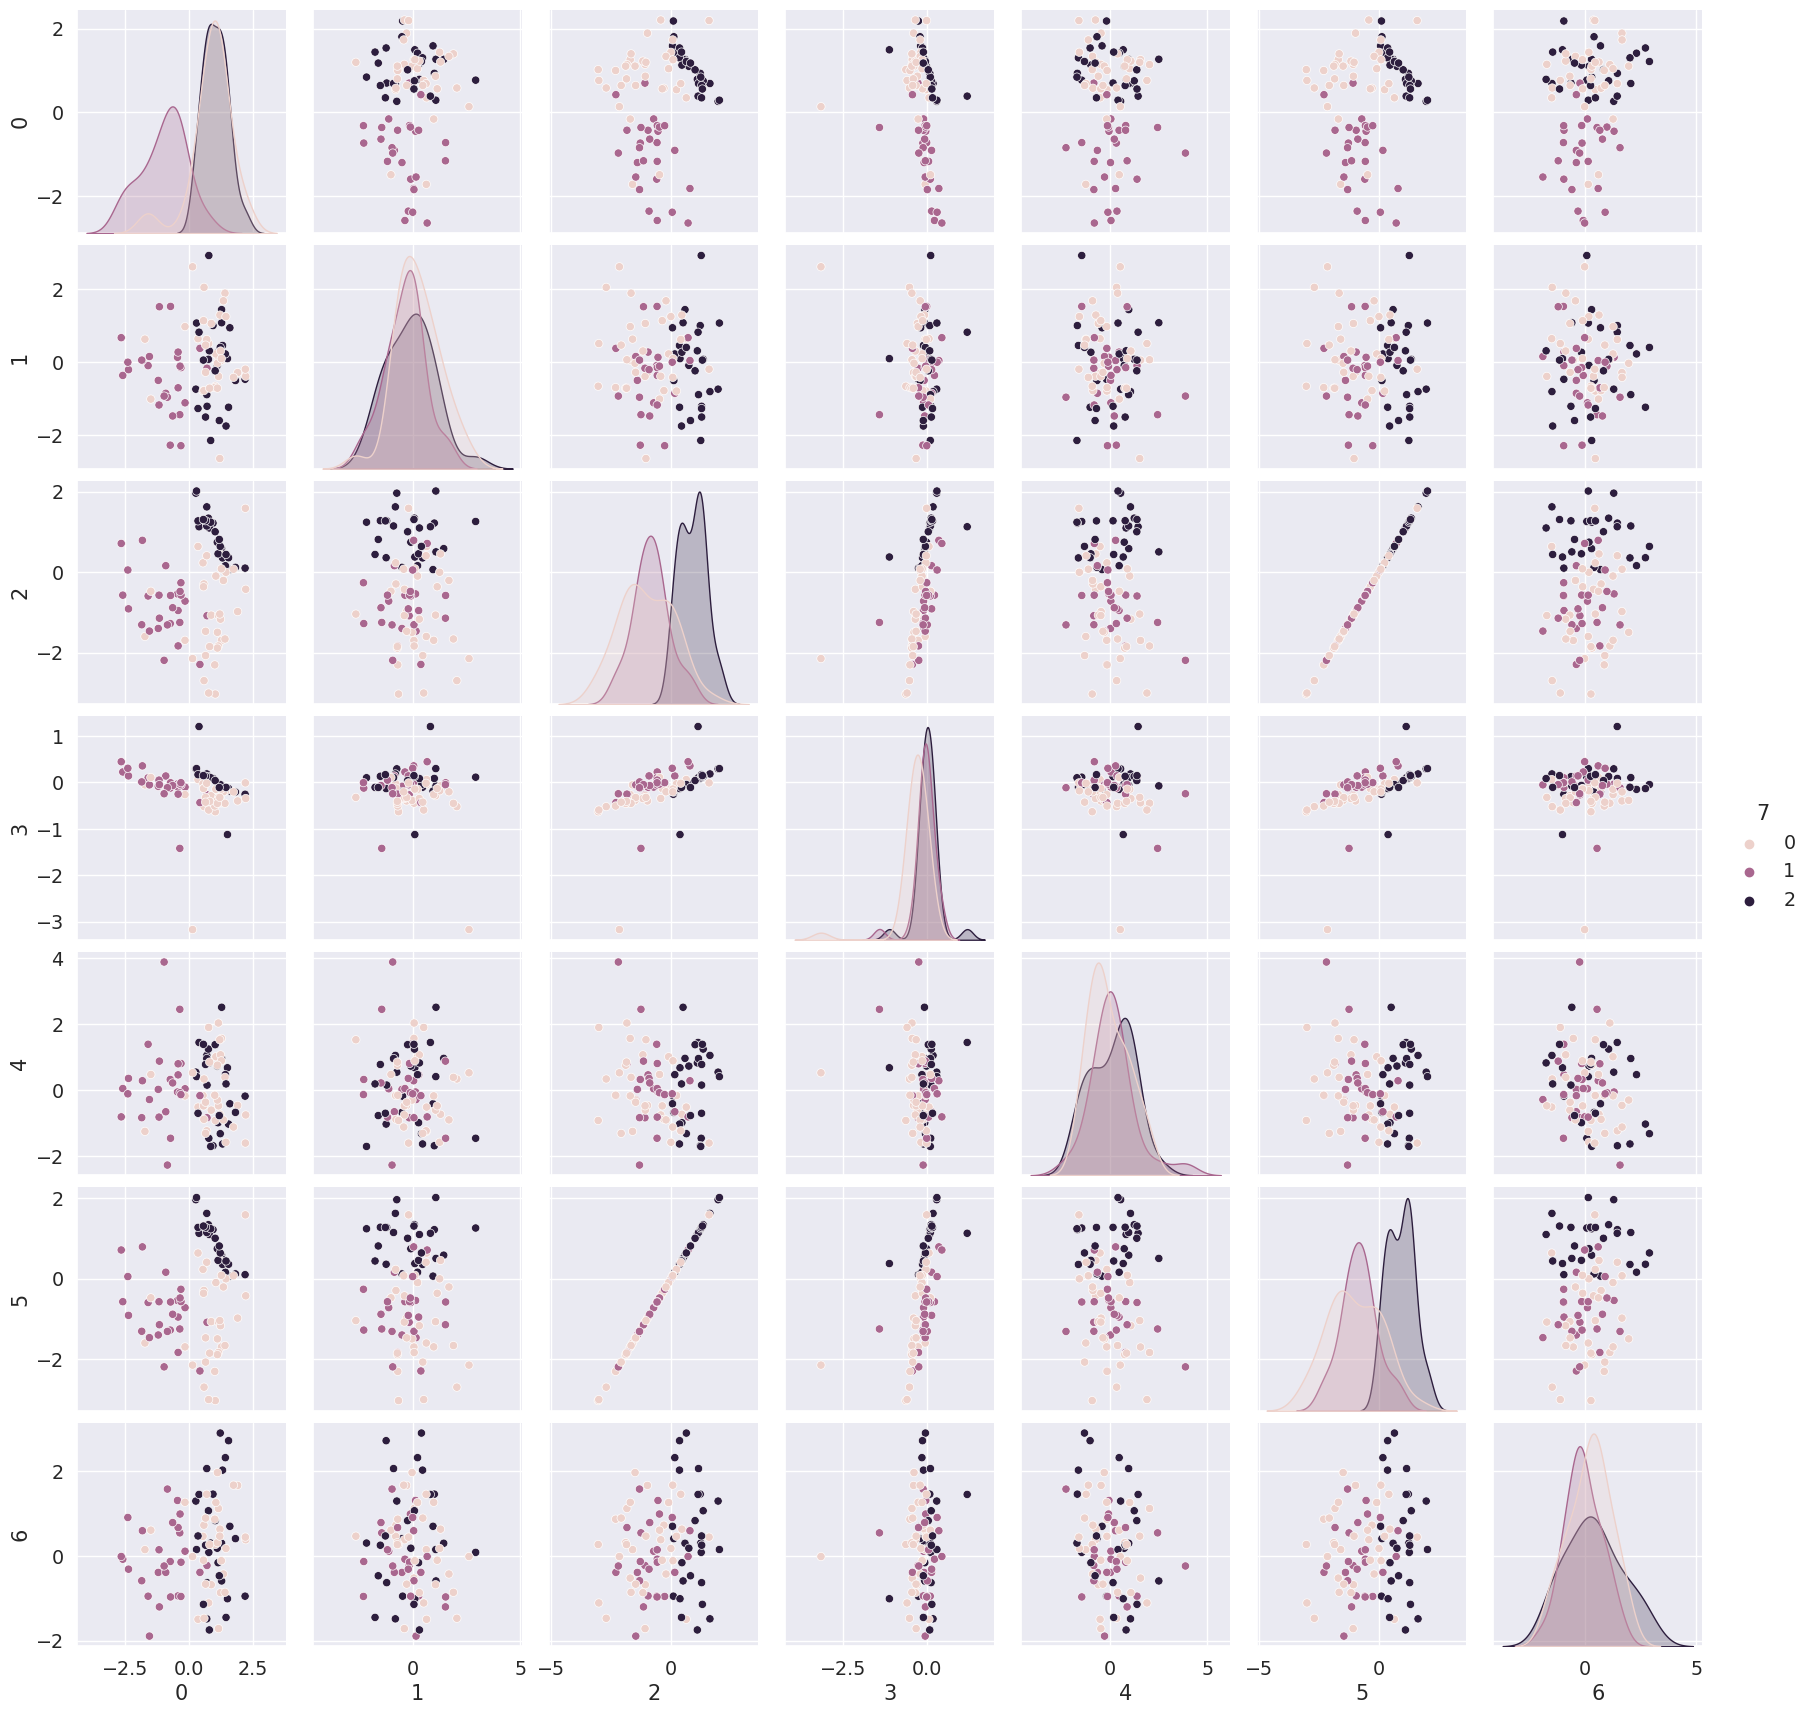

In [15]:
sb.pairplot(df, hue=7)

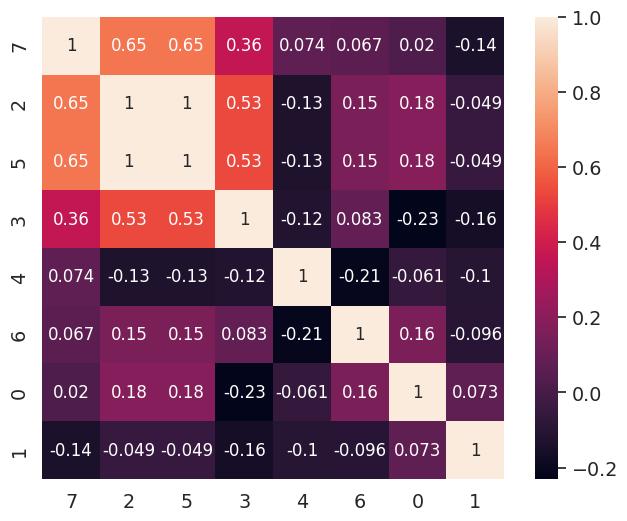

In [16]:
corrmat = df.corr()
k = 8
top8_attr = corrmat.nlargest(k, 7).index
top8_mat = corrmat.loc[top8_attr, top8_attr]
fig,ax = plt.subplots(figsize=(8,6))
sb.set(font_scale=1.25)
sb.heatmap(top8_mat, annot=True, annot_kws={'size':12}, square=True)
plt.show()

In [17]:
x = df.iloc[:, [0, 2, 3, 5, 1]]
y = df.iloc[:, [7]]

3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

4. Для предсказания класса постройте две модели, используя библиотеку sklearn: a. Случайный лес RandomForestClassifier() b. Метод ближайших соседей KNeighborsClassifier()
5. Для каждой модели попытайтесь добиться наилучшего возможного результата предсказания.
6. Оцените качество работы моделей. Выведите метрики модели. Напишите какая модель дала наилучший результат.

In [19]:
max = 0
n_target = 0
for n in range(1, 50):   
    clf = RandomForestRegressor(random_state=1, n_estimators=n)
    clf.fit(X_train, y_train.values.ravel())
    if max < clf.score(X_test, y_test):
        max = clf.score(X_test, y_test)
        n_target = n
print(n_target)

10


In [20]:
clf = RandomForestRegressor(random_state=1, n_estimators=n_target)
clf.fit(X_train, y_train.values.ravel())
#clf.score(X_test, y_test)
y_true = y_test
y_pred = clf.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_true, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 0.30000000000000004
Mean Squared Error (MSE): 0.20222222222222225
Root Mean Squared Error (RMSE): 0.44969125210773475
Mean Absolute Percentage Error (MAPE): 688049943070492.5
Explained Variance Score: 0.7400396825396824
Max Error: 1.1
Mean Squared Log Error: 0.07222122062028603
Median Absolute Error: 0.14999999999999997
R^2: 0.74


In [21]:
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)
#clf.score(X_test, y_test)
y_true = y_test
y_pred = clf.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_true, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 0.31481481481481477
Mean Squared Error (MSE): 0.25308641975308643
Root Mean Squared Error (RMSE): 0.5030769521187454
Mean Absolute Percentage Error (MAPE): 875699927544263.1
Explained Variance Score: 0.681657848324515
Max Error: 1.3333333333333335
Mean Squared Log Error: 0.0962637429947853
Median Absolute Error: 0.0
R^2: 0.6746031746031745


Лучший результат дала модель RandomForestRegressor()